# Basic autoencoder
All credits to: https://blog.keras.io/building-autoencoders-in-keras.html.
The following code is a mere copy of the code from the great tutorial above.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 760 (CNMeM is enabled with initial size: 40.0% of memory, cuDNN 5110)


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input given the encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction     (whole thing)
autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() #y_train and y_test not needed! 

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((len(x_train), num_pixels))
x_test = x_test.reshape((len(x_test), num_pixels))

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s - loss: 0.3793 - val_loss: 0.2728
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.2660 - val_loss: 0.2559
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.2465 - val_loss: 0.2344
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.2271 - val_loss: 0.2168
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.2117 - val_loss: 0.2035
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.2002 - val_loss: 0.1938
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.1916 - val_loss: 0.1862
Epoch 8/50
60000/60000 [==============================] - 0s - loss: 0.1845 - val_loss: 0.1797
Epoch 9/50
60000/60000 [==============================] - 0s - loss: 0.1784 - val_loss: 0.1742
Epoch 10/50
60000/60000 [==============================] - 0s - loss: 0.1731 - val_loss: 0.1692

In [6]:
decoded_imgs = autoencoder.predict(x_test)

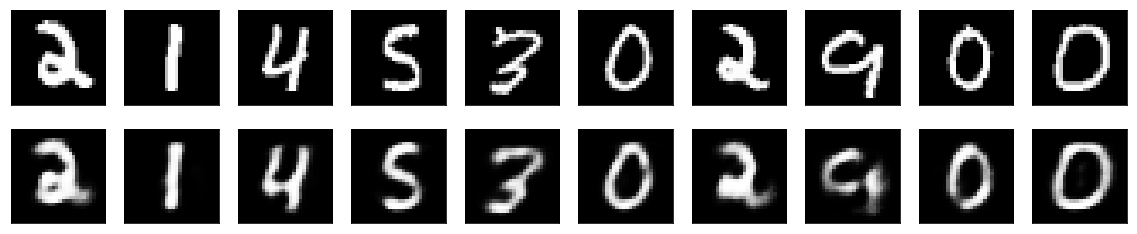

In [7]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    which = np.random.randint(1, len(x_test[0]))
    
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[which].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[which].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()